### Telcom Churn Modeling
- Tree Methodologies (XGBoost, Decision Tree, Random Forest)
- Gridsearch Optimization of Hyperparameters

In [251]:
#Import modules
import pandas as pd

In [252]:
df = pd.read_csv('./Telco-Customer-Churn.csv')

In [253]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Set missing values to 0 for XGB Boost Model

In [254]:
len(df[df['TotalCharges']==' '])

11

In [255]:
#Set to 0
df['TotalCharges'] = df['TotalCharges'].map(lambda i: i.replace(' ', '0'))

In [256]:
#Verify by viewing Tenure
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


### Change Datatype from Object --> `int    float    boolean`

In [257]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#df.dtypes

### To dray a picture of the XGB boost use '_'

In [258]:
df.replace(' ', '_', regex=True, inplace=True)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes


### Split Dataset to Train-Test

In [259]:
#Change Y --> 0-1 (Boolean)
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [260]:
df['Churn'] = df['Churn'].apply(lambda i: 1 if i=='Yes' else 0)

In [261]:
#Set predictors + Target
x = df.drop('Churn', axis=1).copy()
y = df.Churn.copy()

### Format Data `One-Hot Encoding`

In [262]:
df.PaymentMethod.unique()

array(['Electronic_check', 'Mailed_check', 'Bank_transfer_(automatic)',
       'Credit_card_(automatic)'], dtype=object)

In [263]:
x_encoded = pd.get_dummies(x, columns=['gender',
                                       'SeniorCitizen',
                                      'Partner',
                                      'Dependents',
                                      'PhoneService',
                                      'InternetService',
                                      'MultipleLines',
                                      'TechSupport',
                                      'DeviceProtection',
                                      'StreamingTV',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                      'StreamingMovies',
                                      'PaperlessBilling',
                                      'PaymentMethod',
                                      'Contract'])
x_encoded.head(3)

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [264]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Build Preliminary XGBoost Model

In [265]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [266]:
sum(y)/len(y) #27% have churned and left the company

0.2653698707936959

In [267]:
#set to int
for col in x_encoded.columns:
    if x_encoded[col].dtype == 'uint8':
        x_encoded[col] = x_encoded[col].astype(int)
x_encoded.drop('customerID', axis=1, inplace=True)    

In [268]:
x_encoded.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                int64
gender_Male                                  int64
SeniorCitizen_0                              int64
SeniorCitizen_1                              int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
InternetService_DSL                          int64
InternetService_Fiber_optic                  int64
InternetService_No                           int64
MultipleLines_No                             int64
MultipleLines_No_phone_service               int64
MultipleLines_Yes                            int64
TechSupport_No                 

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, random_state=40, stratify=y)

#verify stratification
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.2654297614539947, 0.26519023282226006)

In [270]:
# x_train = x_train.drop('customerID', axis=1)
# x_test = x_test.drop('customerID', axis=1)

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', missing=0, seed=40, eval_metric='aucpr',
                           early_stopping_rounds=10)
clf_xgb.fit(x_train, y_train,
            verbose=True,
            eval_set= [(x_test, y_test)])

            

[0]	validation_0-aucpr:0.63097
[1]	validation_0-aucpr:0.64918
[2]	validation_0-aucpr:0.65729
[3]	validation_0-aucpr:0.66019
[4]	validation_0-aucpr:0.66268
[5]	validation_0-aucpr:0.66381
[6]	validation_0-aucpr:0.66393
[7]	validation_0-aucpr:0.65853
[8]	validation_0-aucpr:0.65738
[9]	validation_0-aucpr:0.65424
[10]	validation_0-aucpr:0.65571
[11]	validation_0-aucpr:0.65784
[12]	validation_0-aucpr:0.65879
[13]	validation_0-aucpr:0.65804
[14]	validation_0-aucpr:0.65677
[15]	validation_0-aucpr:0.65555


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Specify missing values as 0

# Get the predicted labels
y_pred = clf_xgb.predict(x_test)


In [272]:
y_test[-1:-15:-1]

3662    1
5948    0
3839    0
6801    0
850     0
3311    0
3468    0
2315    0
5888    1
6709    0
6223    1
5813    0
3647    0
5805    0
Name: Churn, dtype: int64

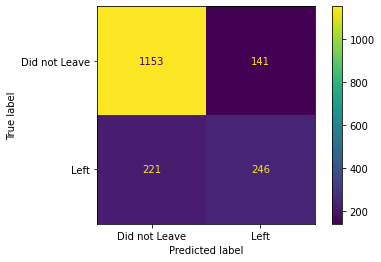

In [273]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predicted labels
y_pred = clf_xgb.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot --> change 0,1 --> didnt leave,left company
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not Leave', 'Left'])

# Plot the confusion matrix
cm_display.plot(values_format='d');


### Optimize Model through Gridsearch

In [77]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1],
#     'reg_lambda': [0, 1, 10],
#     'scale_pos_weight': [1, 3, 5]
# }

# xgb_model = xgb.XGBClassifier()

# gridsearch = GridSearchCV(xgb_model,
#                               param_grid=param_grid,
#                               scoring='roc_auc',
#                               verbose=0,
#                               n_jobs=-1,
#                               cv=3,
#                               error_score='raise')

# gridsearch.fit(x_train, y_train)


## Tree-Based Methods
- Decision Tree Classifier
- Random Forest (Ensemble)
- Gradient Boosted Trees (Ensemble)
- Logistic Regression

#### Initialize Vars and correlation/association

In [274]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1


In [275]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

#### _One Hot Encoding_

In [276]:
x_encoded = pd.get_dummies(x, columns=['gender',
                                      'Partner',
                                      'Dependents',
                                      'PhoneService',
                                      'InternetService',
                                      'MultipleLines',
                                      'TechSupport',
                                      'DeviceProtection',
                                      'StreamingTV',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                      'StreamingMovies',
                                      'PaperlessBilling',
                                      'PaymentMethod',
                                      'Contract'])

x_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0


#### _Split and Stratify Features_

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded.values, y, test_size=.2, stratify=y)

In [278]:
sum(y_train)/len(y_train), sum(y_test)/len(y_test) #Validate stratification

(0.2653532126375577, 0.2654364797728886)

#### Model Development (Decision Tree)

In [279]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=3).fit(x_train, y_train)
clf

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

#### Performance Evaluation 

In [280]:
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)


accuracy_df = pd.DataFrame()
accuracy_df['Decision_T'] = [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)]

In [281]:
accuracy_df.rename(index={0:'Train', 1:'Test'}, inplace=True)
accuracy_df #model suffers from overfitting, regularize the model

,Decision_T
Train,0.802804
Test,0.789922


In [282]:
[print(col,val,'\n') for val, col in zip(clf.feature_importances_,x_encoded.columns)][0]

SeniorCitizen 0.0 

tenure 0.17174041230701878 

MonthlyCharges 0.027357514201583617 

TotalCharges 0.04505360785562992 

gender_Female 0.0 

gender_Male 0.0 

Partner_No 0.0 

Partner_Yes 0.0 

Dependents_No 0.0 

Dependents_Yes 0.0 

PhoneService_No 0.0 

PhoneService_Yes 0.009170635926057331 

InternetService_DSL 0.0 

InternetService_Fiber_optic 0.1593858071018581 

InternetService_No 0.0 

MultipleLines_No 0.0 

MultipleLines_No_phone_service 0.0 

MultipleLines_Yes 0.012958639892058485 

TechSupport_No 0.037527259666911866 

TechSupport_No_internet_service 0.0 

TechSupport_Yes 0.0 

DeviceProtection_No 0.0 

DeviceProtection_No_internet_service 0.0 

DeviceProtection_Yes 0.0 

StreamingTV_No 0.0 

StreamingTV_No_internet_service 0.0 

StreamingTV_Yes 0.0 

OnlineSecurity_No 0.005149054048940292 

OnlineSecurity_No_internet_service 0.0 

OnlineSecurity_Yes 0.0 

OnlineBackup_No 0.0 

OnlineBackup_No_internet_service 0.0 

OnlineBackup_Yes 0.0 

StreamingMovies_No 0.0 

StreamingM

#### Hyperparameter Optimization - Gridsearch CV 

In [283]:
search_space = {
    'max_depth' : [3, 5,7,9,11], #depth of tree 
    'min_samples_leaf': [3, 5,10,15] #min samples in lead node to continue branching
}


In [284]:
gs = GridSearchCV(DecisionTreeClassifier(),
            param_grid=search_space,
            scoring='accuracy',
                  verbose=3,
            cv=5)
gs

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 10, 15]},
             scoring='accuracy', verbose=3)

In [285]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...max_depth=3, min_samples_leaf=3;, score=0.784 total time=   0.3s
[CV 2/5] END ...max_depth=3, min_samples_leaf=3;, score=0.772 total time=   0.3s
[CV 3/5] END ...max_depth=3, min_samples_leaf=3;, score=0.806 total time=   0.3s
[CV 4/5] END ...max_depth=3, min_samples_leaf=3;, score=0.780 total time=   0.3s
[CV 5/5] END ...max_depth=3, min_samples_leaf=3;, score=0.782 total time=   0.3s
[CV 1/5] END ...max_depth=3, min_samples_leaf=5;, score=0.784 total time=   0.3s
[CV 2/5] END ...max_depth=3, min_samples_leaf=5;, score=0.772 total time=   0.3s
[CV 3/5] END ...max_depth=3, min_samples_leaf=5;, score=0.806 total time=   0.3s
[CV 4/5] END ...max_depth=3, min_samples_leaf=5;, score=0.780 total time=   0.3s
[CV 5/5] END ...max_depth=3, min_samples_leaf=5;, score=0.782 total time=   0.3s
[CV 1/5] END ..max_depth=3, min_samples_leaf=10;, score=0.784 total time=   0.3s
[CV 2/5] END ..max_depth=3, min_samples_leaf=10

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 10, 15]},
             scoring='accuracy', verbose=3)

In [286]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [287]:
# find average score/sd for the k-fold cross validation of each set/mix of parameters 
def print_results(gridsearch, metric=None):
    if metric:
        print('BEST PARAMS: {} | {} Score: {}\n'.format(gridsearch.best_params_, metric, 
                                                        GS.cv_results_[f'mean_test_{metric}'].max()))
        [print(f'{mean_test:.2f} +/-{std:.2f} for {params}')\
         for params, mean_test, std in zip(gridsearch.cv_results_['params'], \
                                           gridsearch.cv_results_[f'mean_test_{metric}'], \
                                           gridsearch.cv_results_[f'std_test_{metric}'])][0]
    else:
        print('BEST PARAMS: {}\n'.format(gridsearch.best_params_))
        [print(f'{mean_test:.4f} +/-{std:.2f} for {params}')\
         for params, mean_test, std in zip(gridsearch.cv_results_['params'], \
                                           gridsearch.cv_results_['mean_test_score'], \
                                           gridsearch.cv_results_['std_test_score'])][0]
        
print_results(gs)

BEST PARAMS: {'max_depth': 5, 'min_samples_leaf': 15}

0.7847 +/-0.01 for {'max_depth': 3, 'min_samples_leaf': 3}
0.7847 +/-0.01 for {'max_depth': 3, 'min_samples_leaf': 5}
0.7847 +/-0.01 for {'max_depth': 3, 'min_samples_leaf': 10}
0.7847 +/-0.01 for {'max_depth': 3, 'min_samples_leaf': 15}
0.7900 +/-0.01 for {'max_depth': 5, 'min_samples_leaf': 3}
0.7902 +/-0.01 for {'max_depth': 5, 'min_samples_leaf': 5}
0.7902 +/-0.01 for {'max_depth': 5, 'min_samples_leaf': 10}
0.7906 +/-0.01 for {'max_depth': 5, 'min_samples_leaf': 15}
0.7865 +/-0.01 for {'max_depth': 7, 'min_samples_leaf': 3}
0.7868 +/-0.01 for {'max_depth': 7, 'min_samples_leaf': 5}
0.7861 +/-0.01 for {'max_depth': 7, 'min_samples_leaf': 10}
0.7886 +/-0.01 for {'max_depth': 7, 'min_samples_leaf': 15}
0.7694 +/-0.01 for {'max_depth': 9, 'min_samples_leaf': 3}
0.7742 +/-0.01 for {'max_depth': 9, 'min_samples_leaf': 5}
0.7778 +/-0.01 for {'max_depth': 9, 'min_samples_leaf': 10}
0.7806 +/-0.01 for {'max_depth': 9, 'min_samples_leaf

## Random Forest

In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(random_state=5, max_depth=5, min_samples_leaf=5)
bagging = BaggingClassifier(base_estimator=tree, n_estimators=10, random_state=44, bootstrap=True)
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_leaf=5,
                                                        random_state=5),
                  random_state=44)

In [290]:
print('Training Score:', accuracy_score(y_train, bagging.predict(x_train)))
print('Testing Score:', accuracy_score(y_test, bagging.predict(x_test)))

Training Score: 0.805111821086262
Testing Score: 0.794889992902768


### Gridsearch on Random Forest 
- n_estimators (trees utilized in modeling)

In [291]:
search_space = {
    'n_estimators' : [5,10,15,20]
}

gs = GridSearchCV(BaggingClassifier(base_estimator=tree),
            param_grid=search_space,
            scoring='accuracy',
                  verbose=3,
            cv=5)
gs

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                               min_samples_leaf=5,
                                                                               random_state=5)),
             param_grid={'n_estimators': [5, 10, 15, 20]}, scoring='accuracy',
             verbose=3)

In [292]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................n_estimators=5;, score=0.792 total time=   0.7s
[CV 2/5] END ....................n_estimators=5;, score=0.783 total time=   0.7s
[CV 3/5] END ....................n_estimators=5;, score=0.810 total time=   0.7s
[CV 4/5] END ....................n_estimators=5;, score=0.791 total time=   0.7s
[CV 5/5] END ....................n_estimators=5;, score=0.797 total time=   0.7s
[CV 1/5] END ...................n_estimators=10;, score=0.795 total time=   1.4s
[CV 2/5] END ...................n_estimators=10;, score=0.784 total time=   1.4s
[CV 3/5] END ...................n_estimators=10;, score=0.808 total time=   1.4s
[CV 4/5] END ...................n_estimators=10;, score=0.789 total time=   1.4s
[CV 5/5] END ...................n_estimators=10;, score=0.797 total time=   1.4s
[CV 1/5] END ...................n_estimators=15;, score=0.801 total time=   2.1s
[CV 2/5] END ...................n_estimators=15;,

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                               min_samples_leaf=5,
                                                                               random_state=5)),
             param_grid={'n_estimators': [5, 10, 15, 20]}, scoring='accuracy',
             verbose=3)

### Logistic Regression
- Associated Sigmoid Probabilities
- Regularization
- Hyperparameter optimization

#### Pre-Process and Cleanse Data
- Categorical Ordinal Encoding

In [293]:
df.Contract.unique()
df['Contract'] = df['Contract'].map(lambda i: 0 if i=='Month-to-month' else(1 if i=='One_year' else 2))

In [294]:
df['TechSupport'] = df['TechSupport'].map(lambda x: 0 if x=='No' else 1) 

In [295]:
df['InternetService'].unique()
df['InternetService'] = df['InternetService'].map(lambda i: 0 if i=='No' else(1 if i=='Fiber_optic' else 2))

In [296]:
df['PaymentMethod'].unique()
df['PaymentMethod'] = df['PaymentMethod'].map(lambda i: 0 if i=='Electronic_check' else(1 if i == 'Mailed_check' else(2 if i=='Bank_transfer_' else 3)))

In [355]:
#Initialize Predictors and Outcome 
x = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'TechSupport', 'InternetService',
       'PaymentMethod']]
y = df['Churn']

#### Model Development

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)


lr_model = LogisticRegression(C=3, max_iter=500)
lr_model.fit(x_train, y_train)

LogisticRegression(C=3, max_iter=500)

In [357]:
print('Training Score:', accuracy_score(y_train, lr_model.predict(x_train)))
print('Testing Score:', accuracy_score(y_test, lr_model.predict(x_test)))

Training Score: 0.7949946751863685
Testing Score: 0.7849538679914834


#### Probability Analysis

In [360]:
df_probs = pd.DataFrame(x)
df_probs['Probability'] = lr_model.predict_proba(x)[:,1]

In [372]:
y_hat = lr_model.predict(x.iloc[:,:-1])
df_probs['Churn'], df_probs['y_hat'] = y, y_hat

In [374]:
df_probs.head(3)

,tenure,MonthlyCharges,TotalCharges,Contract,TechSupport,InternetService,PaymentMethod,Probability,Churn,y_hat
0,1,29.85,29.85,0,0,2,0,0.457784,0,0
1,34,56.95,1889.50,1,0,2,1,0.119225,0,0
2,2,53.85,108.15,0,0,2,1,0.516413,1,1


#### Confusion Matrix

In [160]:
from sklearn.linear_model import LogisticRegression
import numpy as np
# Replace X and y with your own data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Input variable (independent variable)
y = np.array([0, 0, 0, 1, 1])  # Target variable (dependent variable)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Replace new_data with your own data
new_data = np.array([6, 7, 8]).reshape(-1, 1)  # New data points

# Predict the probabilities and classes for new data points
probabilities = logreg.predict_proba(new_data)[:, 1]  

In [157]:
probabilities

array([0.92647655, 0.97290023, 0.99031772])

In [159]:
probabilities

array([0.07352345, 0.02709977, 0.00968228])

In [214]:
import math
math.sqrt(25)

5.0

### SVM